In [14]:
import pandas as pd
!pip install seaborn
import matplotlib.pyplot as plt

In [15]:
df = pd.read_csv('./openface_features_500_vids.csv', low_memory = False)

In [16]:
copy = df.copy()
cols = copy.columns.drop('video_id')
copy[cols] = copy[cols].apply(pd.to_numeric, errors='coerce')

# copy = pd.to_numeric(copy)
# copy.groupby('video_id').mean().reset_index()


In [17]:
final = copy.copy()
mean = final.groupby('video_id').std().reset_index()

In [18]:
labels = pd.read_csv('./raw_data_v2.csv')
mean['rating'] = 0.0
print(labels.head(n=5))

   Unnamed: 0      title              published_at  subscriberCount  \
0           0  Team Coco  2008-06-23T02:45:04.000Z          7730000   
1           1  Team Coco  2008-06-23T02:45:04.000Z          7730000   
2           2  Team Coco  2008-06-23T02:45:04.000Z          7730000   
3           3  Team Coco  2008-06-23T02:45:04.000Z          7730000   
4           4  Team Coco  2008-06-23T02:45:04.000Z          7730000   

   videoCount   viewCount      video_published_date  video_commentCount  \
0        8411  6551340275  2020-03-03T03:29:19.000Z                 152   
1        8411  6551340275  2020-02-26T18:22:26.000Z                 105   
2        8411  6551340275  2020-02-11T18:13:12.000Z                  95   
3        8411  6551340275  2020-01-30T18:24:55.000Z                 105   
4        8411  6551340275  2020-01-21T18:14:09.000Z                  77   

   video_viewCount  video_likeCount  video_dislikeCount  video_favoriteCount  \
0            14243              422       

In [19]:
for index, row in labels.iterrows():
    mean.loc[mean.video_id == row.video_id, 'rating'] = row['video_likeCount']/row['video_viewCount']

In [20]:
# Gaze related features
print(mean.columns)

Index(['video_id', 'frame', ' face_id', ' timestamp', ' confidence',
       ' success', ' gaze_0_x', ' gaze_0_y', ' gaze_0_z', ' gaze_1_x',
       ...
       ' AU14_c', ' AU15_c', ' AU17_c', ' AU20_c', ' AU23_c', ' AU25_c',
       ' AU26_c', ' AU28_c', ' AU45_c', 'rating'],
      dtype='object', length=716)


In [21]:
X = mean[[' gaze_0_x', ' gaze_0_y', ' gaze_0_z', ' gaze_1_x', ' gaze_1_y', ' gaze_1_z', ' gaze_angle_x', ' gaze_angle_y', ' eye_lmk_x_0', ' eye_lmk_x_1', ' eye_lmk_x_2', ' eye_lmk_x_3', ' eye_lmk_x_4', ' eye_lmk_x_5', ' eye_lmk_x_6', ' eye_lmk_x_7', ' eye_lmk_x_8', ' eye_lmk_x_9', ' eye_lmk_x_10', ' eye_lmk_x_11', ' eye_lmk_x_12', ' eye_lmk_x_13', ' eye_lmk_x_14', ' eye_lmk_x_15', ' eye_lmk_x_16', ' eye_lmk_x_17', ' eye_lmk_x_18', ' eye_lmk_x_19', ' eye_lmk_x_20', ' eye_lmk_x_21', ' eye_lmk_x_22', ' eye_lmk_x_23', ' eye_lmk_x_24', ' eye_lmk_x_25', ' eye_lmk_x_26', ' eye_lmk_x_27', ' eye_lmk_x_28', ' eye_lmk_x_29', ' eye_lmk_x_30', ' eye_lmk_x_31', ' eye_lmk_x_32', ' eye_lmk_x_33', ' eye_lmk_x_34', ' eye_lmk_x_35', ' eye_lmk_x_36', ' eye_lmk_x_37', ' eye_lmk_x_38', ' eye_lmk_x_39', ' eye_lmk_x_40', ' eye_lmk_x_41', ' eye_lmk_x_42', ' eye_lmk_x_43', ' eye_lmk_x_44', ' eye_lmk_x_45', ' eye_lmk_x_46', ' eye_lmk_x_47', ' eye_lmk_x_48', ' eye_lmk_x_49', ' eye_lmk_x_50', ' eye_lmk_x_51', ' eye_lmk_x_52', ' eye_lmk_x_53', ' eye_lmk_x_54', ' eye_lmk_x_55', ' eye_lmk_y_1', ' eye_lmk_y_2', ' eye_lmk_y_3', ' eye_lmk_y_4', ' eye_lmk_y_5', ' eye_lmk_y_6', ' eye_lmk_y_7', ' eye_lmk_y_8', ' eye_lmk_y_9', ' eye_lmk_y_10', ' eye_lmk_y_11', ' eye_lmk_y_12', ' eye_lmk_y_13', ' eye_lmk_y_14', ' eye_lmk_y_15', ' eye_lmk_y_16', ' eye_lmk_y_17', ' eye_lmk_y_18', ' eye_lmk_y_19', ' eye_lmk_y_20', ' eye_lmk_y_21', ' eye_lmk_y_22', ' eye_lmk_y_23', ' eye_lmk_y_24', ' eye_lmk_y_25', ' eye_lmk_y_26', ' eye_lmk_y_27', ' eye_lmk_y_28', ' eye_lmk_y_29', ' eye_lmk_y_30', ' eye_lmk_y_31', ' eye_lmk_y_32', ' eye_lmk_y_33', ' eye_lmk_y_34', ' eye_lmk_y_35', ' eye_lmk_y_36', ' eye_lmk_y_37', ' eye_lmk_y_38', ' eye_lmk_y_39', ' eye_lmk_y_40', ' eye_lmk_y_41', ' eye_lmk_y_42', ' eye_lmk_y_43', ' eye_lmk_y_44', ' eye_lmk_y_45', ' eye_lmk_y_46', ' eye_lmk_y_47', ' eye_lmk_y_48', ' eye_lmk_y_49', ' eye_lmk_y_50', ' eye_lmk_y_51', ' eye_lmk_y_52', ' eye_lmk_y_53', ' eye_lmk_y_54', ' eye_lmk_y_55']]

In [22]:
y = mean[['rating']]

In [23]:
data = mean[[' gaze_0_x', ' gaze_0_y', ' gaze_0_z', ' gaze_1_x', ' gaze_1_y', ' gaze_1_z', ' gaze_angle_x', ' gaze_angle_y', ' eye_lmk_x_0', 'rating']]

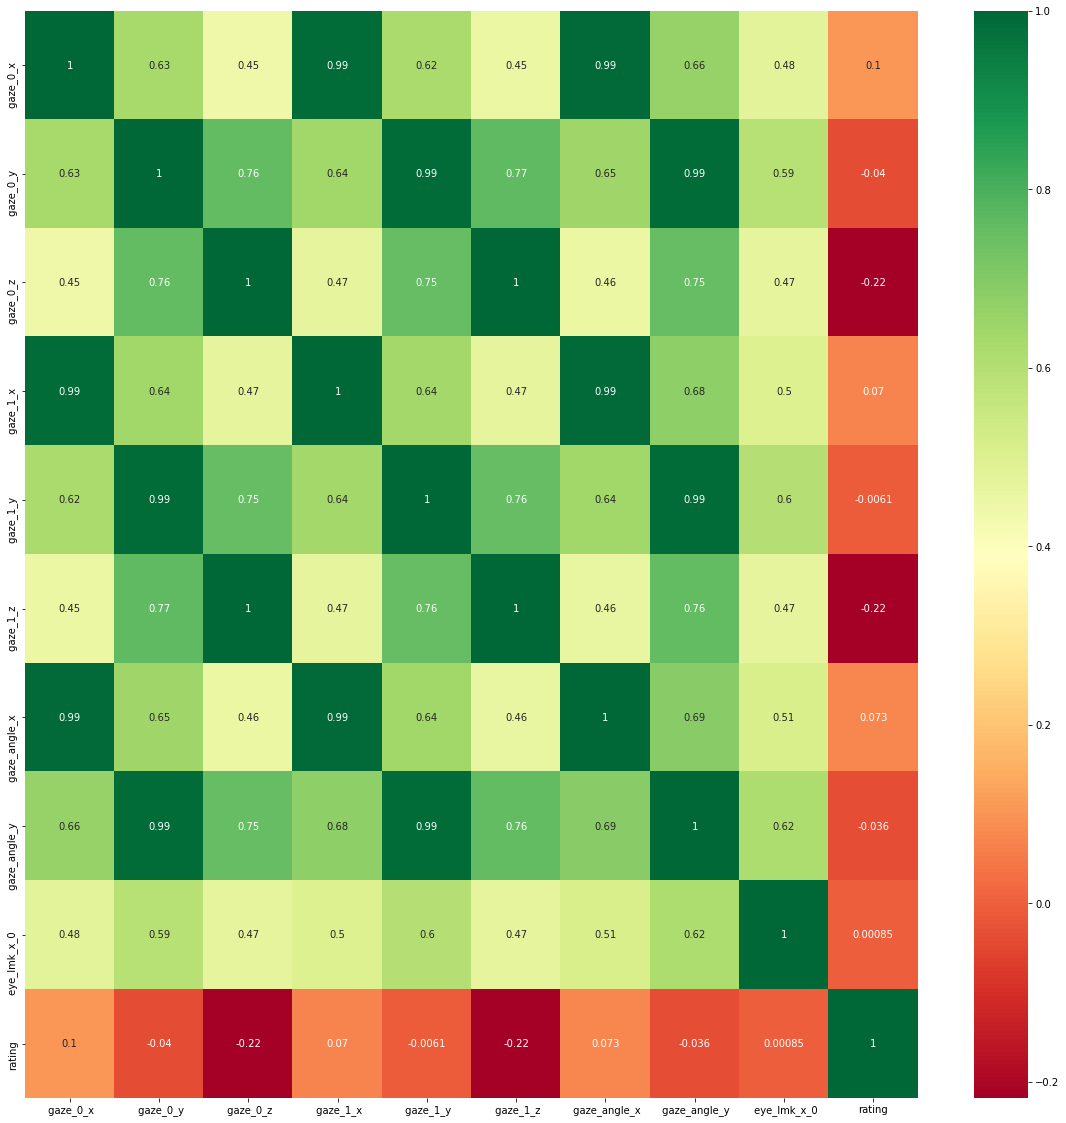

In [24]:

import pandas as pd
import numpy as np
import seaborn as sns

corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

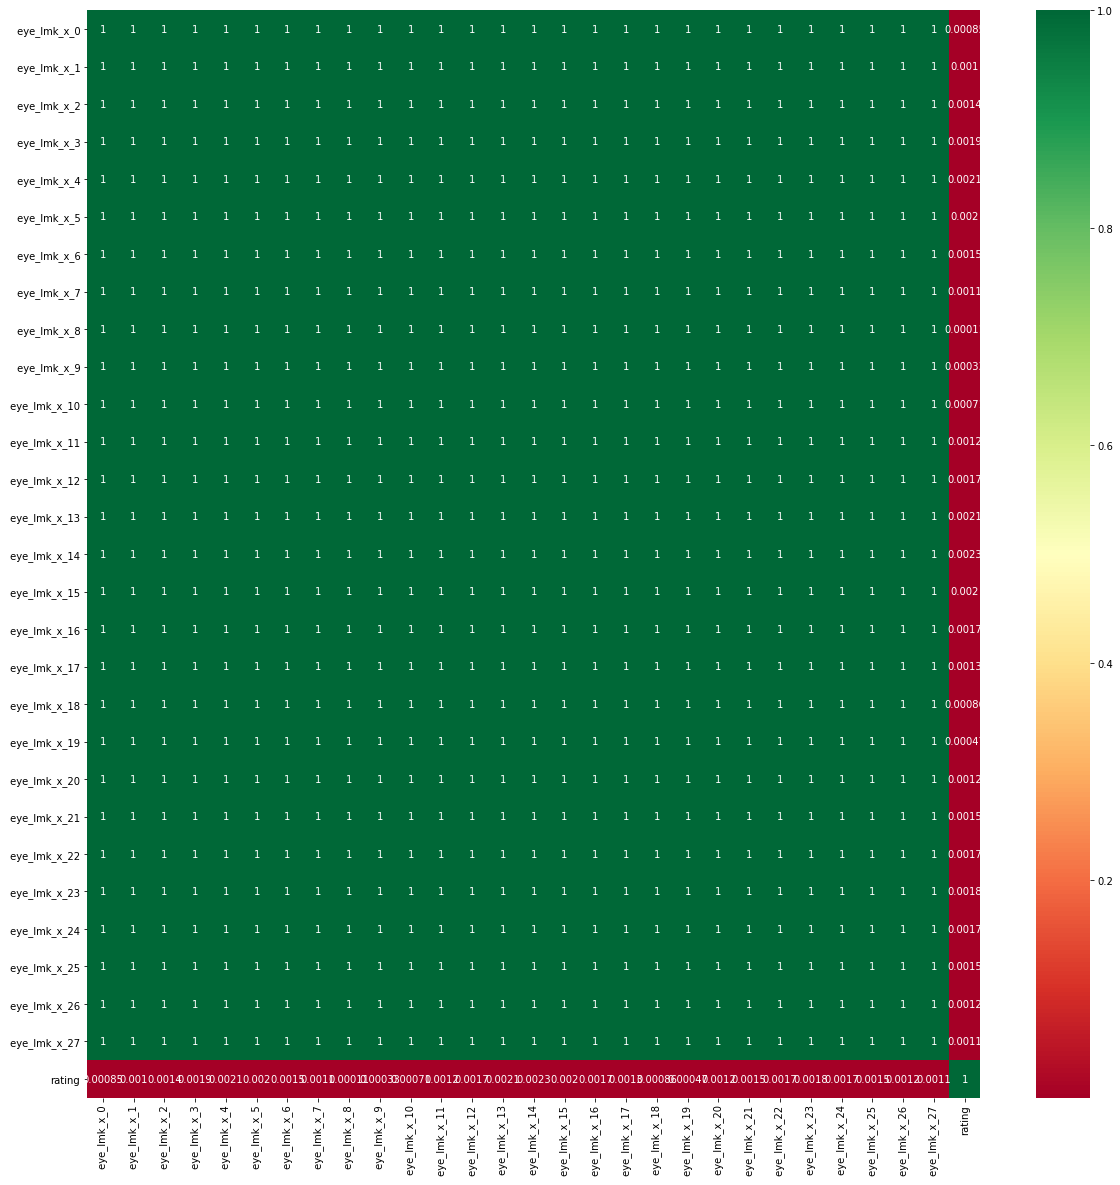

In [25]:
data = mean[[' eye_lmk_x_0', ' eye_lmk_x_1', ' eye_lmk_x_2', ' eye_lmk_x_3', ' eye_lmk_x_4', ' eye_lmk_x_5', ' eye_lmk_x_6', ' eye_lmk_x_7', ' eye_lmk_x_8', ' eye_lmk_x_9', ' eye_lmk_x_10', ' eye_lmk_x_11', ' eye_lmk_x_12', ' eye_lmk_x_13', ' eye_lmk_x_14', ' eye_lmk_x_15', ' eye_lmk_x_16', ' eye_lmk_x_17', ' eye_lmk_x_18', ' eye_lmk_x_19', ' eye_lmk_x_20', ' eye_lmk_x_21', ' eye_lmk_x_22', ' eye_lmk_x_23', ' eye_lmk_x_24', ' eye_lmk_x_25', ' eye_lmk_x_26', ' eye_lmk_x_27', 'rating']]
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

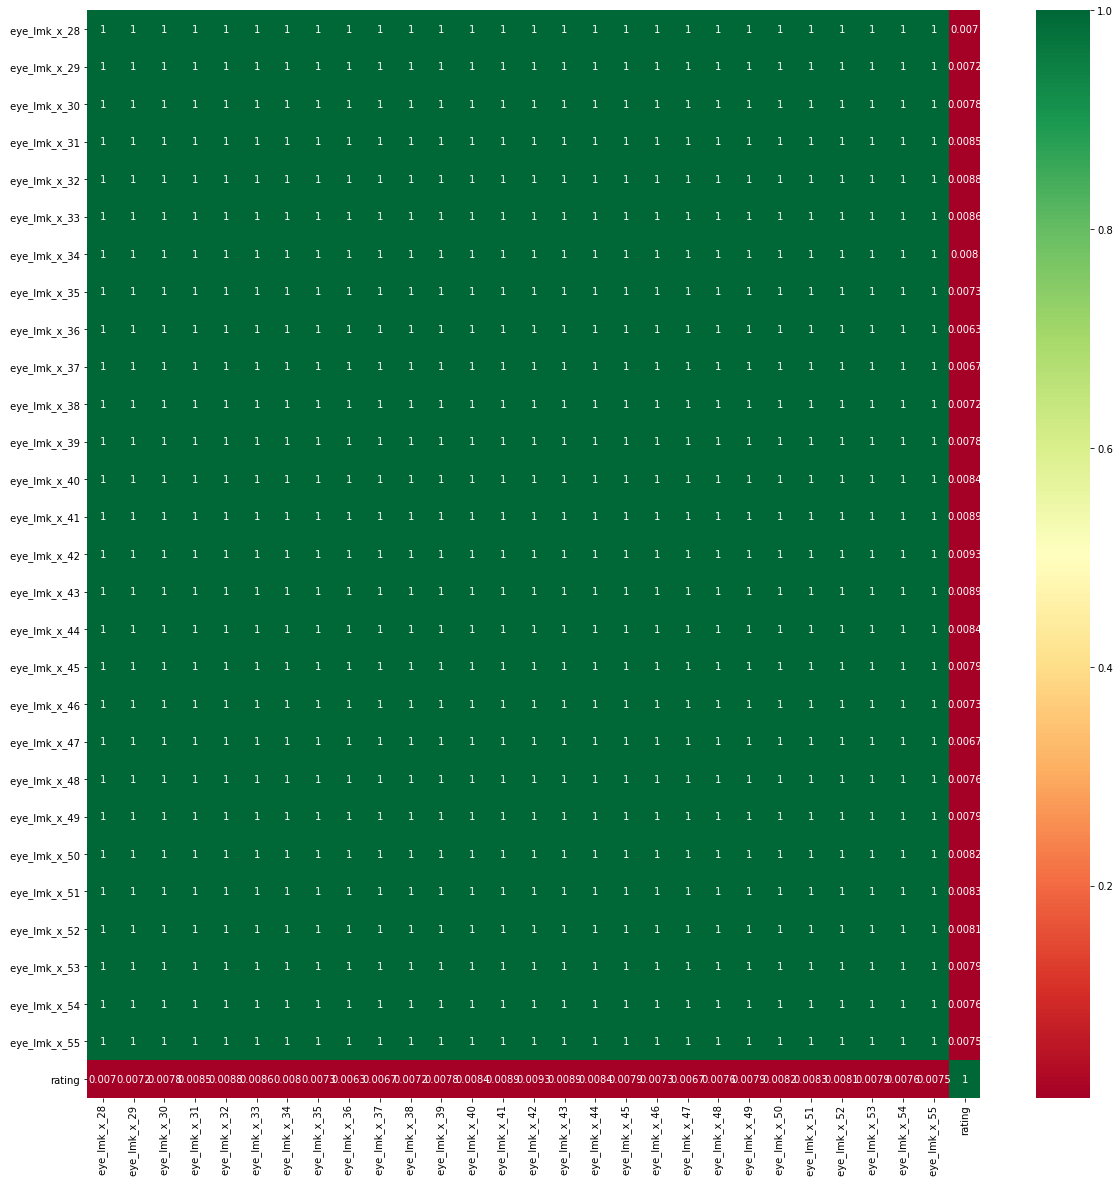

In [26]:
data = mean[[' eye_lmk_x_28', ' eye_lmk_x_29', ' eye_lmk_x_30', ' eye_lmk_x_31', ' eye_lmk_x_32', ' eye_lmk_x_33', ' eye_lmk_x_34', ' eye_lmk_x_35', ' eye_lmk_x_36', ' eye_lmk_x_37', ' eye_lmk_x_38', ' eye_lmk_x_39', ' eye_lmk_x_40', ' eye_lmk_x_41', ' eye_lmk_x_42', ' eye_lmk_x_43', ' eye_lmk_x_44', ' eye_lmk_x_45', ' eye_lmk_x_46', ' eye_lmk_x_47', ' eye_lmk_x_48', ' eye_lmk_x_49', ' eye_lmk_x_50', ' eye_lmk_x_51', ' eye_lmk_x_52', ' eye_lmk_x_53', ' eye_lmk_x_54', ' eye_lmk_x_55', 'rating']]
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

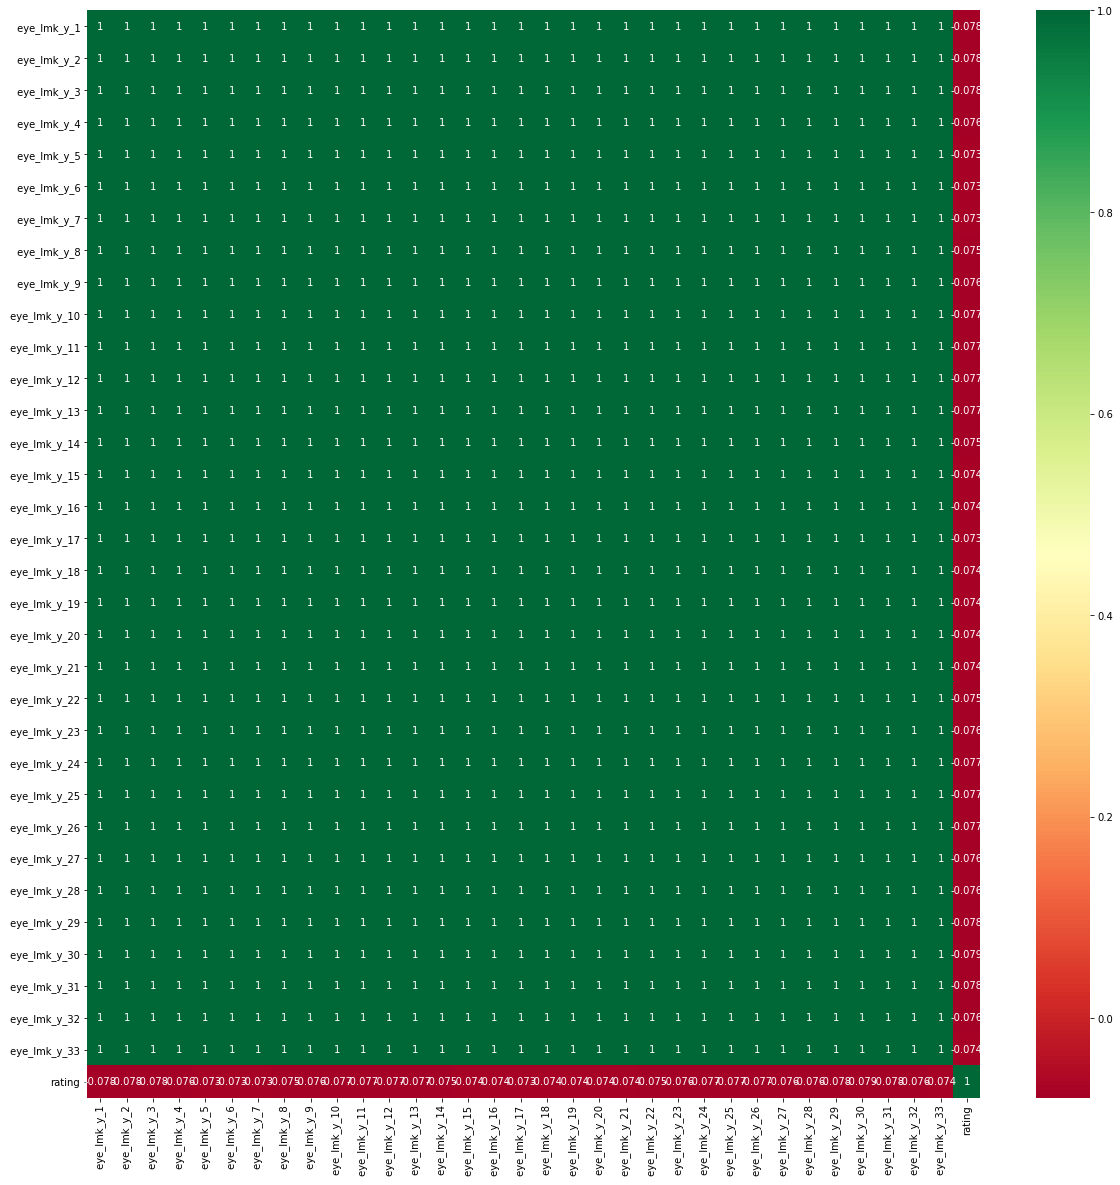

In [27]:
data = mean[[ ' eye_lmk_y_1', ' eye_lmk_y_2', ' eye_lmk_y_3', ' eye_lmk_y_4', ' eye_lmk_y_5', ' eye_lmk_y_6', ' eye_lmk_y_7', ' eye_lmk_y_8', ' eye_lmk_y_9', ' eye_lmk_y_10', ' eye_lmk_y_11', ' eye_lmk_y_12', ' eye_lmk_y_13', ' eye_lmk_y_14', ' eye_lmk_y_15', ' eye_lmk_y_16', ' eye_lmk_y_17', ' eye_lmk_y_18', ' eye_lmk_y_19', ' eye_lmk_y_20', ' eye_lmk_y_21', ' eye_lmk_y_22', ' eye_lmk_y_23', ' eye_lmk_y_24', ' eye_lmk_y_25', ' eye_lmk_y_26', ' eye_lmk_y_27', ' eye_lmk_y_28', ' eye_lmk_y_29', ' eye_lmk_y_30', ' eye_lmk_y_31', ' eye_lmk_y_32', ' eye_lmk_y_33', 'rating']]
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

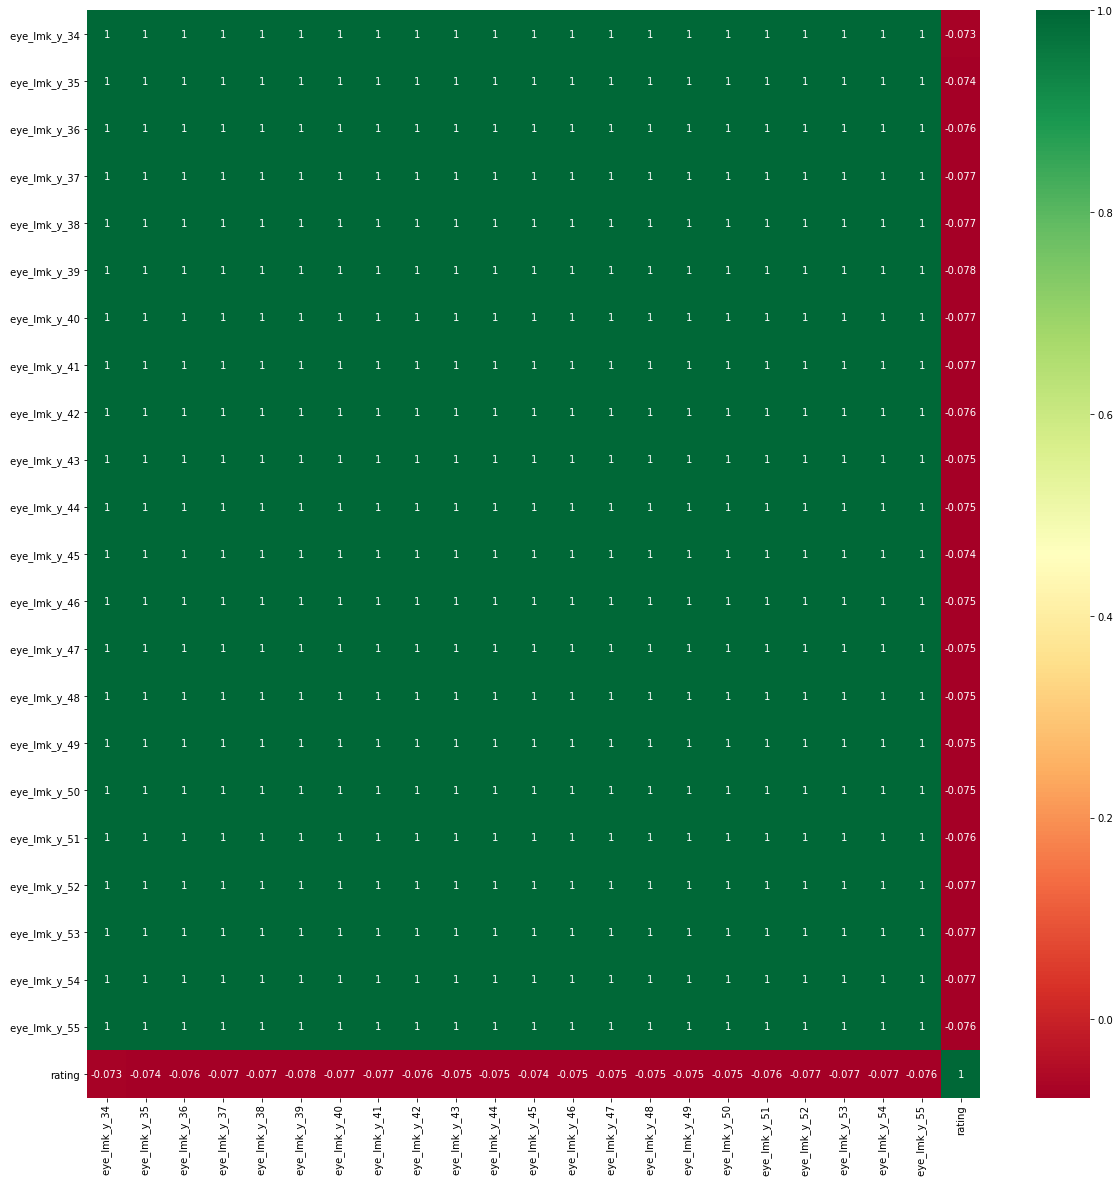

In [28]:
data = mean[[' eye_lmk_y_34', ' eye_lmk_y_35', ' eye_lmk_y_36', ' eye_lmk_y_37', ' eye_lmk_y_38', ' eye_lmk_y_39', ' eye_lmk_y_40', ' eye_lmk_y_41', ' eye_lmk_y_42', ' eye_lmk_y_43', ' eye_lmk_y_44', ' eye_lmk_y_45', ' eye_lmk_y_46', ' eye_lmk_y_47', ' eye_lmk_y_48', ' eye_lmk_y_49', ' eye_lmk_y_50', ' eye_lmk_y_51', ' eye_lmk_y_52', ' eye_lmk_y_53', ' eye_lmk_y_54', ' eye_lmk_y_55', 'rating']]
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

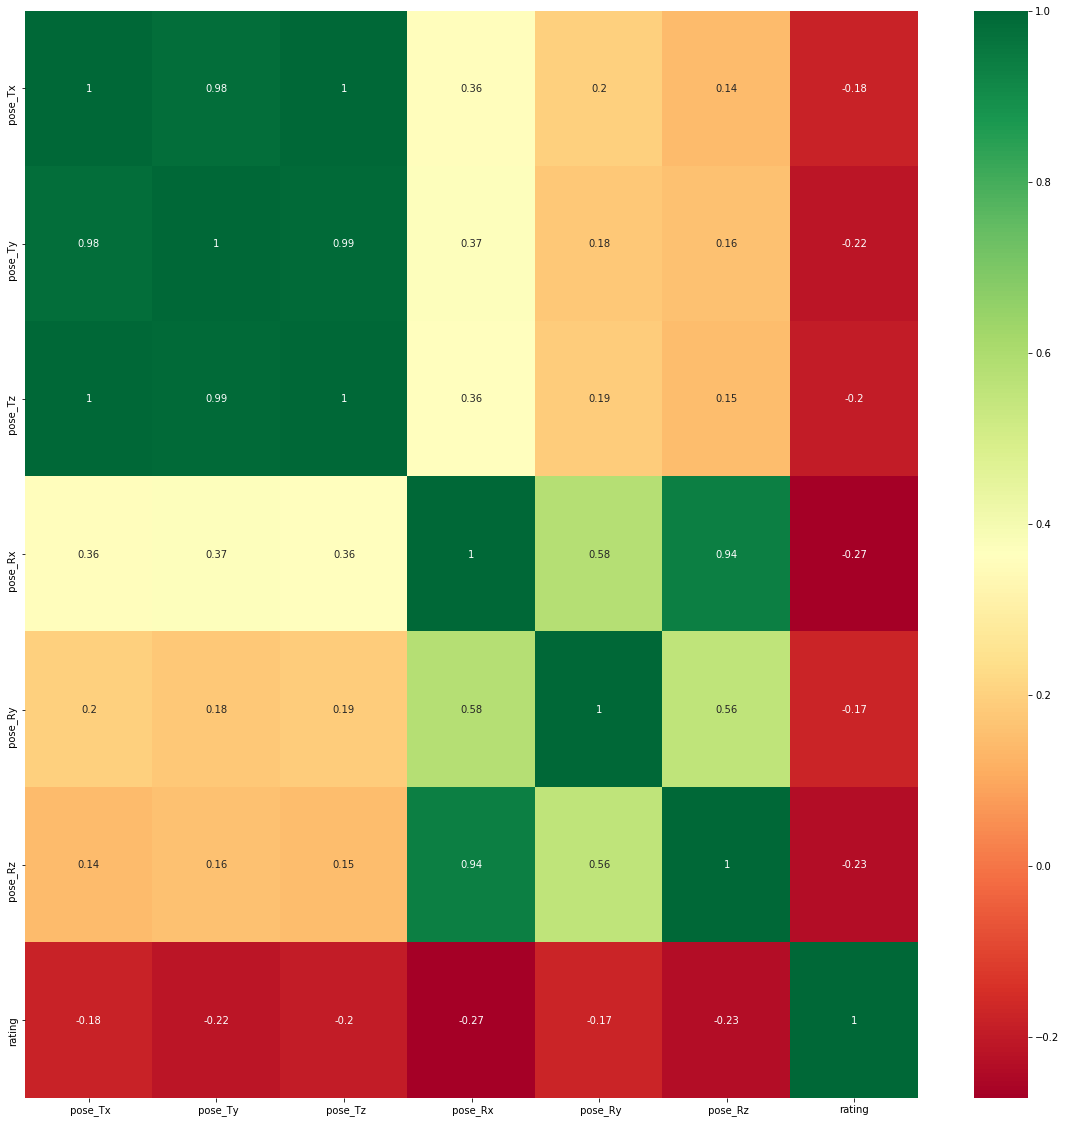

In [29]:
data = mean[[' pose_Tx', ' pose_Ty', ' pose_Tz', ' pose_Rx', ' pose_Ry', ' pose_Rz', 'rating']]
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

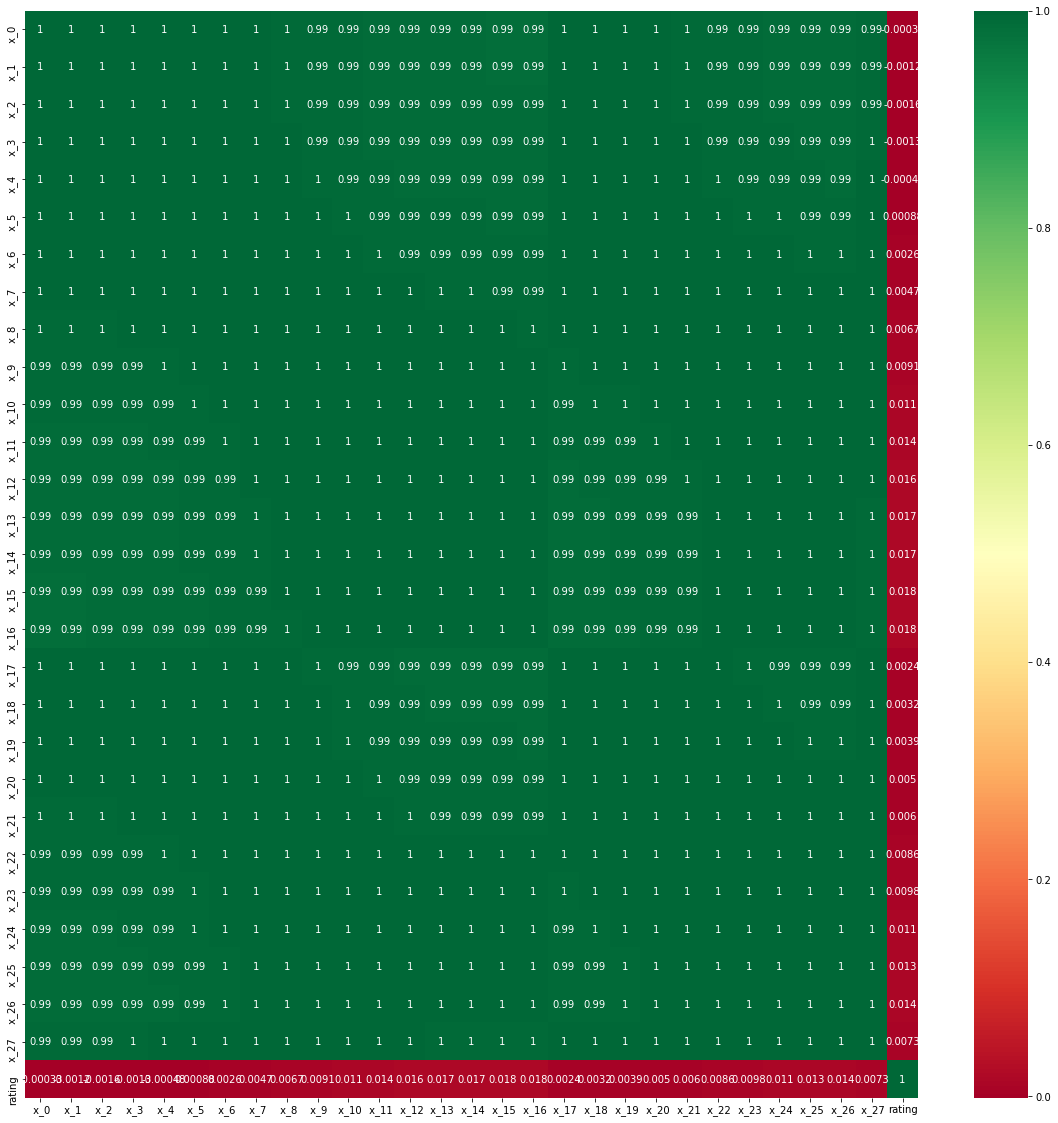

In [30]:
data = mean[[' x_0', ' x_1', ' x_2', ' x_3', ' x_4', ' x_5', ' x_6', ' x_7', ' x_8', ' x_9', ' x_10', ' x_11', ' x_12', ' x_13', ' x_14', ' x_15', ' x_16', ' x_17', ' x_18', ' x_19', ' x_20', ' x_21', ' x_22', ' x_23', ' x_24', ' x_25', ' x_26', ' x_27', 'rating']]
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

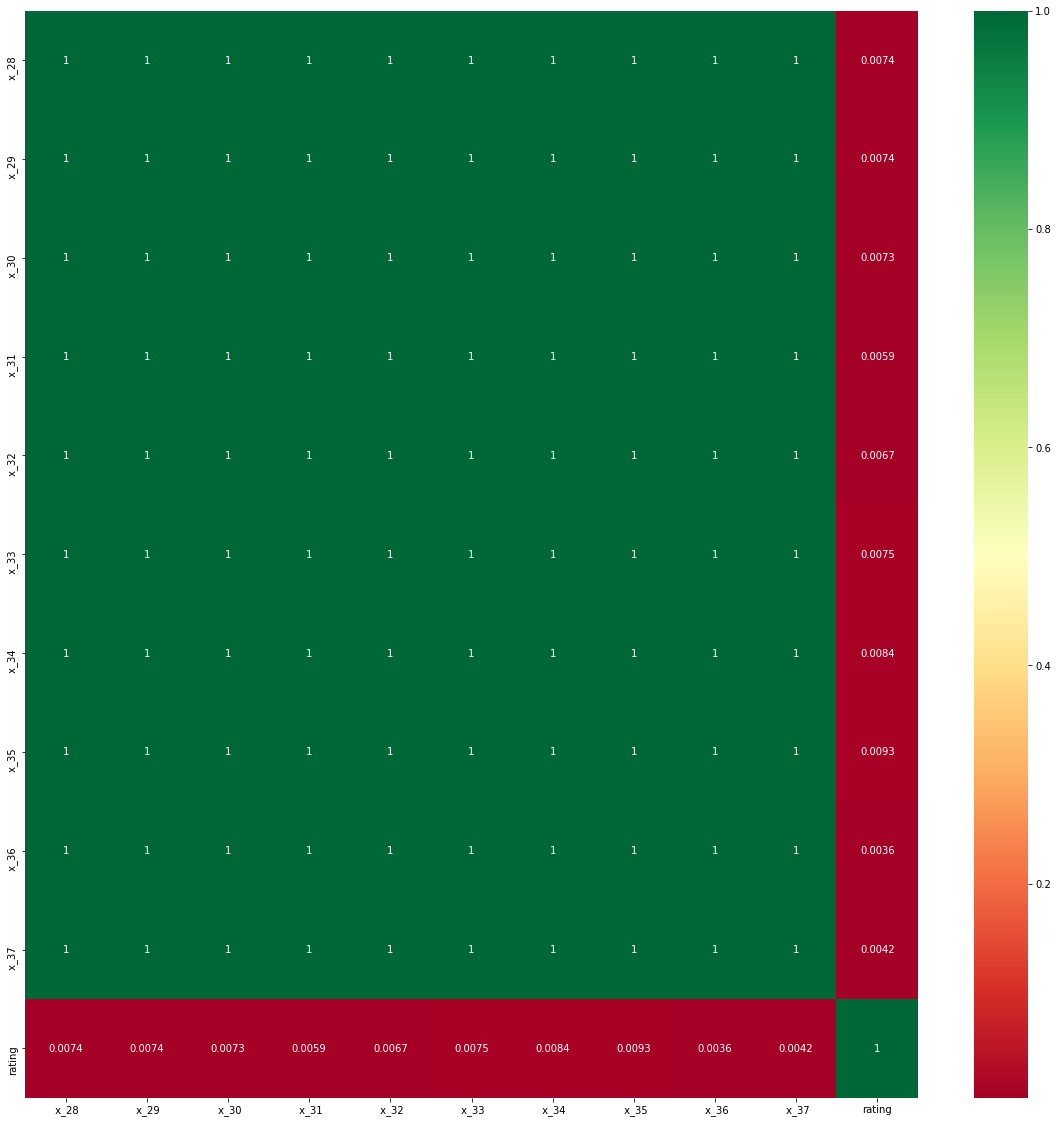

In [31]:
data = mean[[ ' x_28', ' x_29', ' x_30', ' x_31', ' x_32', ' x_33', ' x_34', ' x_35', ' x_36', ' x_37', 'rating']]
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")


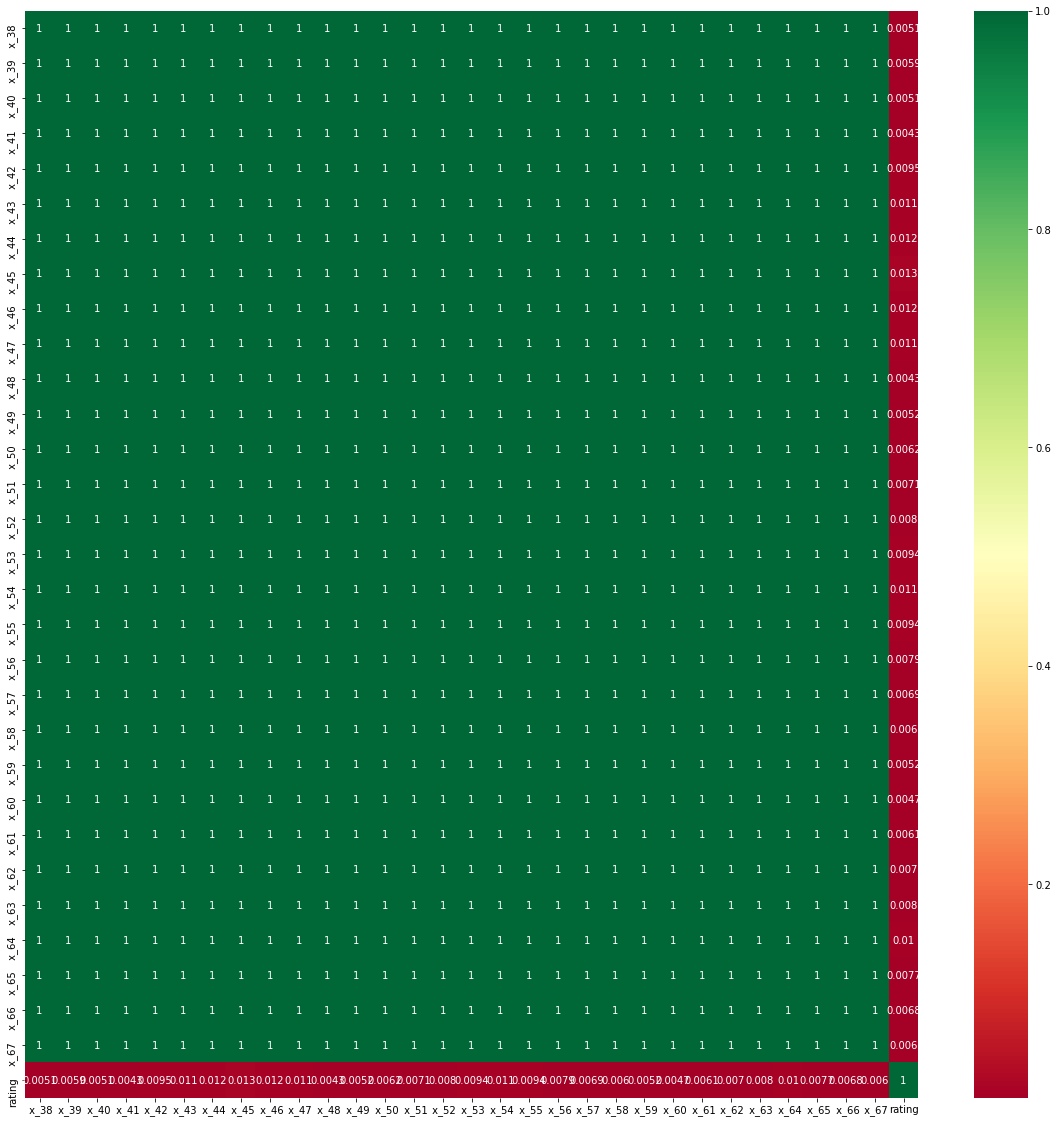

In [32]:
data = mean[[' x_38', ' x_39', ' x_40', ' x_41', ' x_42', ' x_43', ' x_44', ' x_45', ' x_46', ' x_47', ' x_48', ' x_49', ' x_50', ' x_51', ' x_52', ' x_53', ' x_54', ' x_55', ' x_56', ' x_57', ' x_58', ' x_59', ' x_60', ' x_61', ' x_62', ' x_63', ' x_64', ' x_65', ' x_66', ' x_67', 'rating']]
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

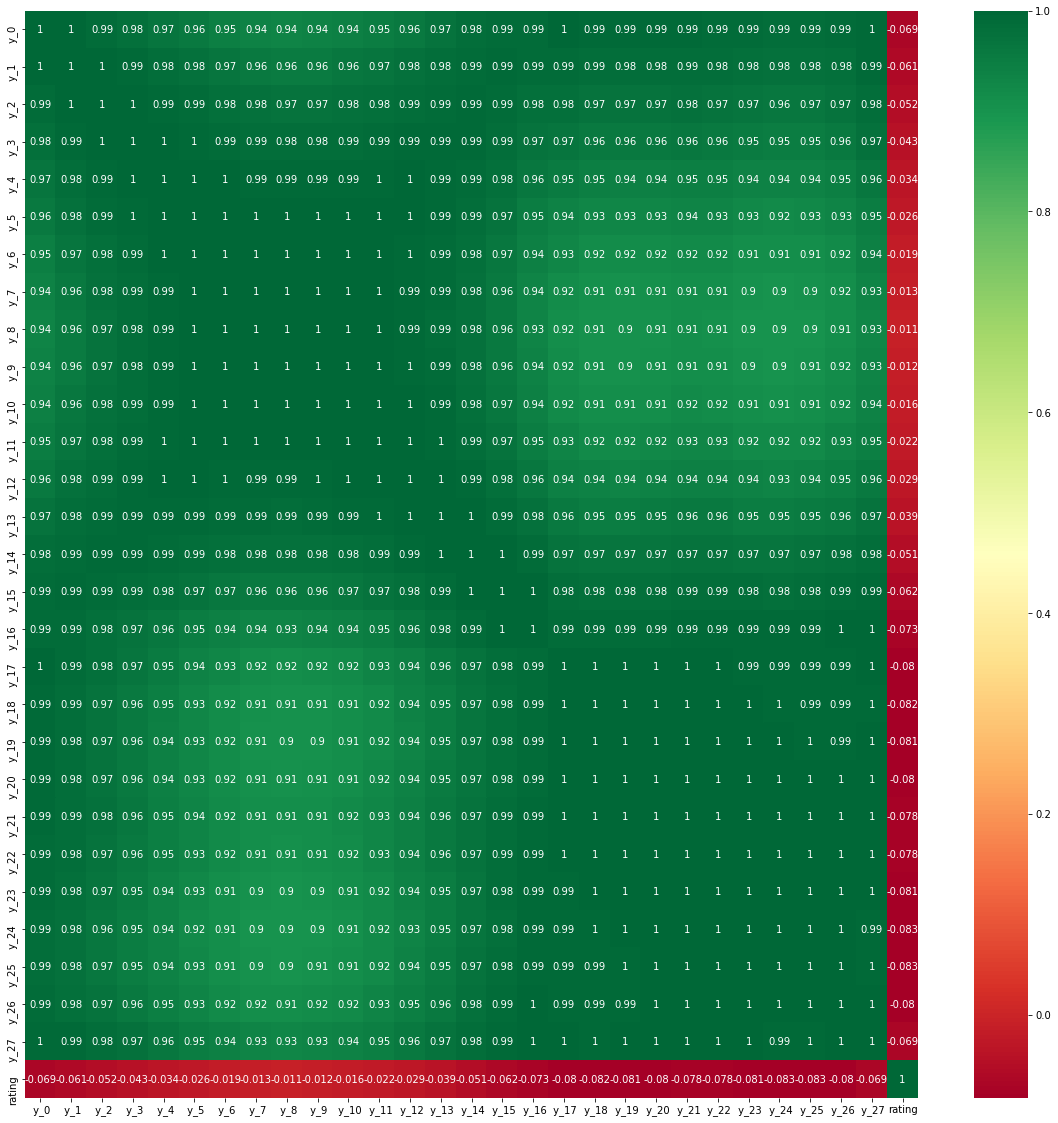

In [33]:
data = mean[[' y_0', ' y_1', ' y_2', ' y_3', ' y_4', ' y_5', ' y_6', ' y_7', ' y_8', ' y_9', ' y_10', ' y_11', ' y_12', ' y_13', ' y_14', ' y_15', ' y_16', ' y_17', ' y_18', ' y_19', ' y_20', ' y_21', ' y_22', ' y_23', ' y_24', ' y_25', ' y_26', ' y_27', 'rating']]
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

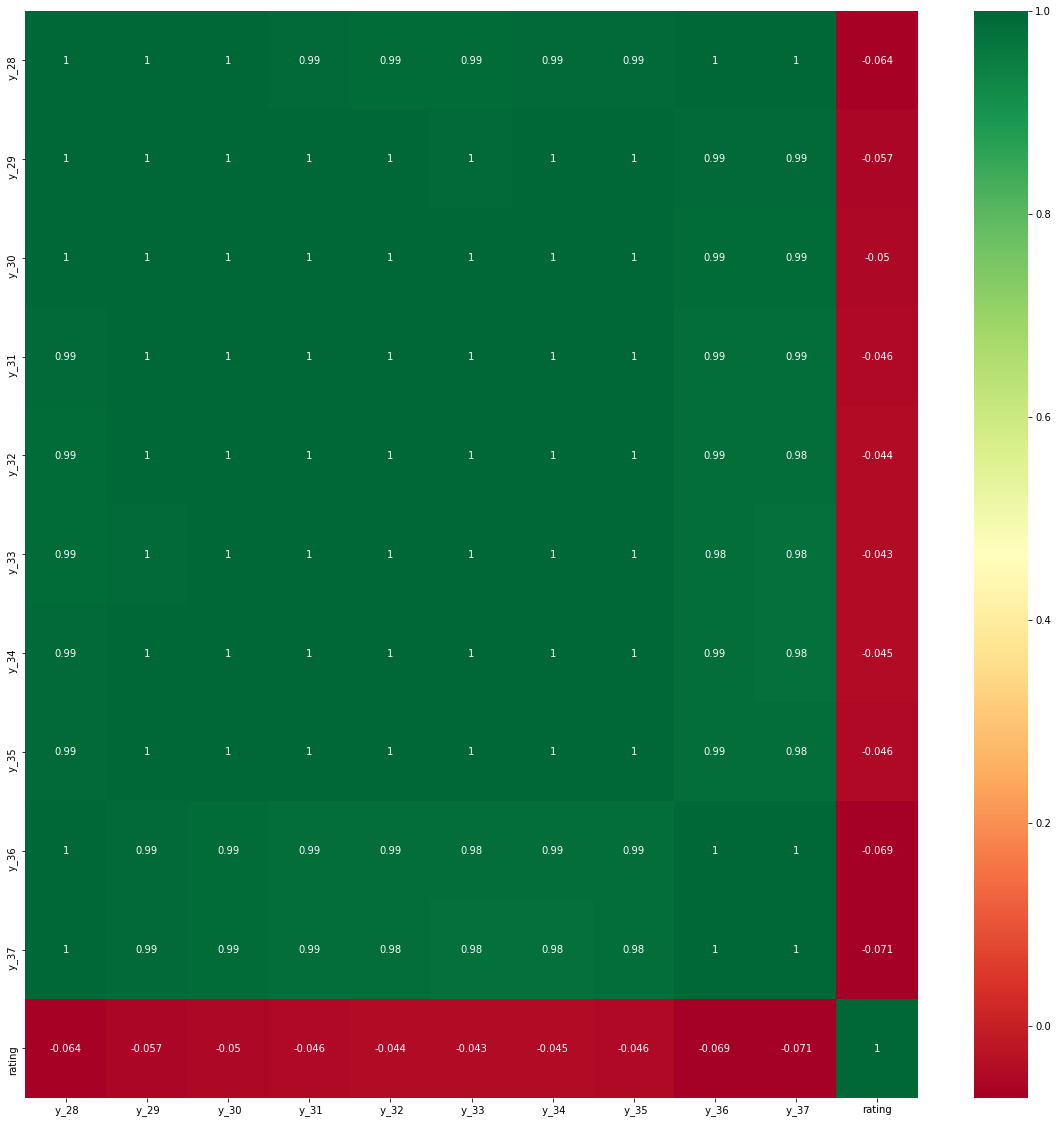

In [34]:
data = mean[[ ' y_28', ' y_29', ' y_30', ' y_31', ' y_32', ' y_33', ' y_34', ' y_35', ' y_36', ' y_37', 'rating']]
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")


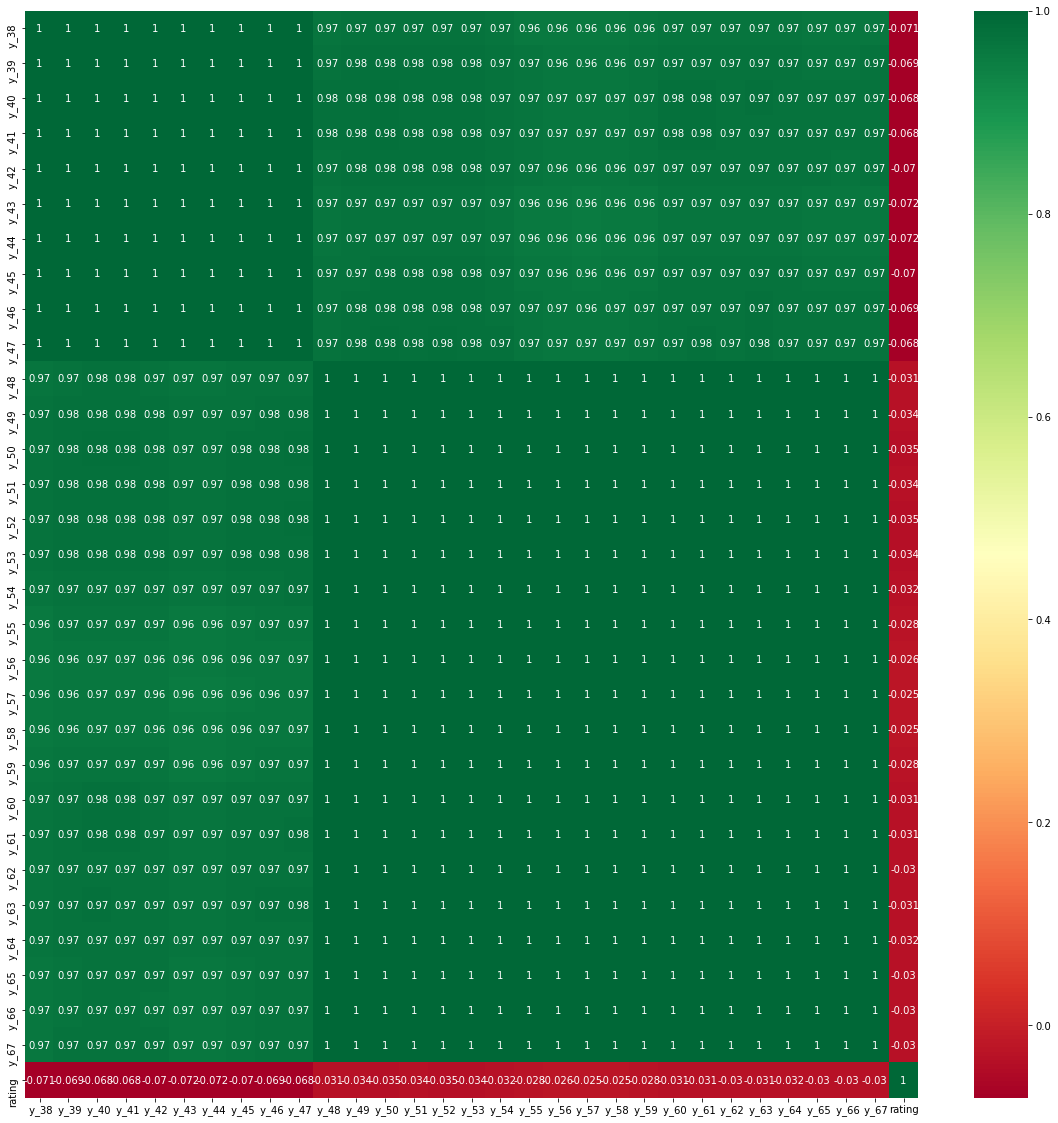

In [35]:
data = mean[[' y_38', ' y_39', ' y_40', ' y_41', ' y_42', ' y_43', ' y_44', ' y_45', ' y_46', ' y_47', ' y_48', ' y_49', ' y_50', ' y_51', ' y_52', ' y_53', ' y_54', ' y_55', ' y_56', ' y_57', ' y_58', ' y_59', ' y_60', ' y_61', ' y_62', ' y_63', ' y_64', ' y_65', ' y_66', ' y_67', 'rating']]
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

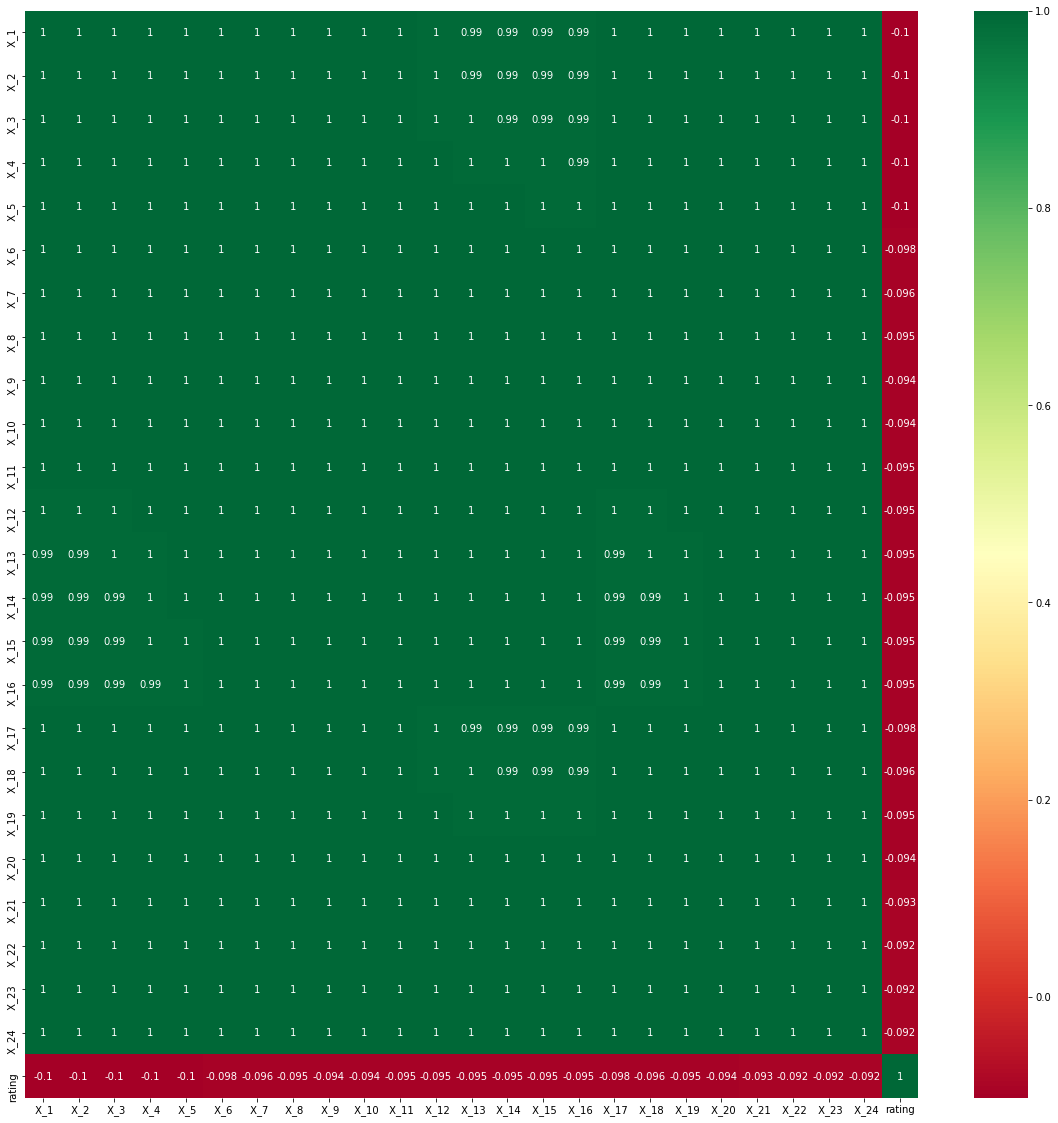

In [36]:
data = mean[[ ' X_1', ' X_2',  ' X_3',  ' X_4',  ' X_5',  ' X_6',  ' X_7',  ' X_8',  ' X_9',  ' X_10',  ' X_11',  ' X_12',  ' X_13',  ' X_14',  ' X_15',  ' X_16',  ' X_17',  ' X_18',  ' X_19',  ' X_20',  ' X_21',  ' X_22',  ' X_23',  ' X_24', 'rating']]
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

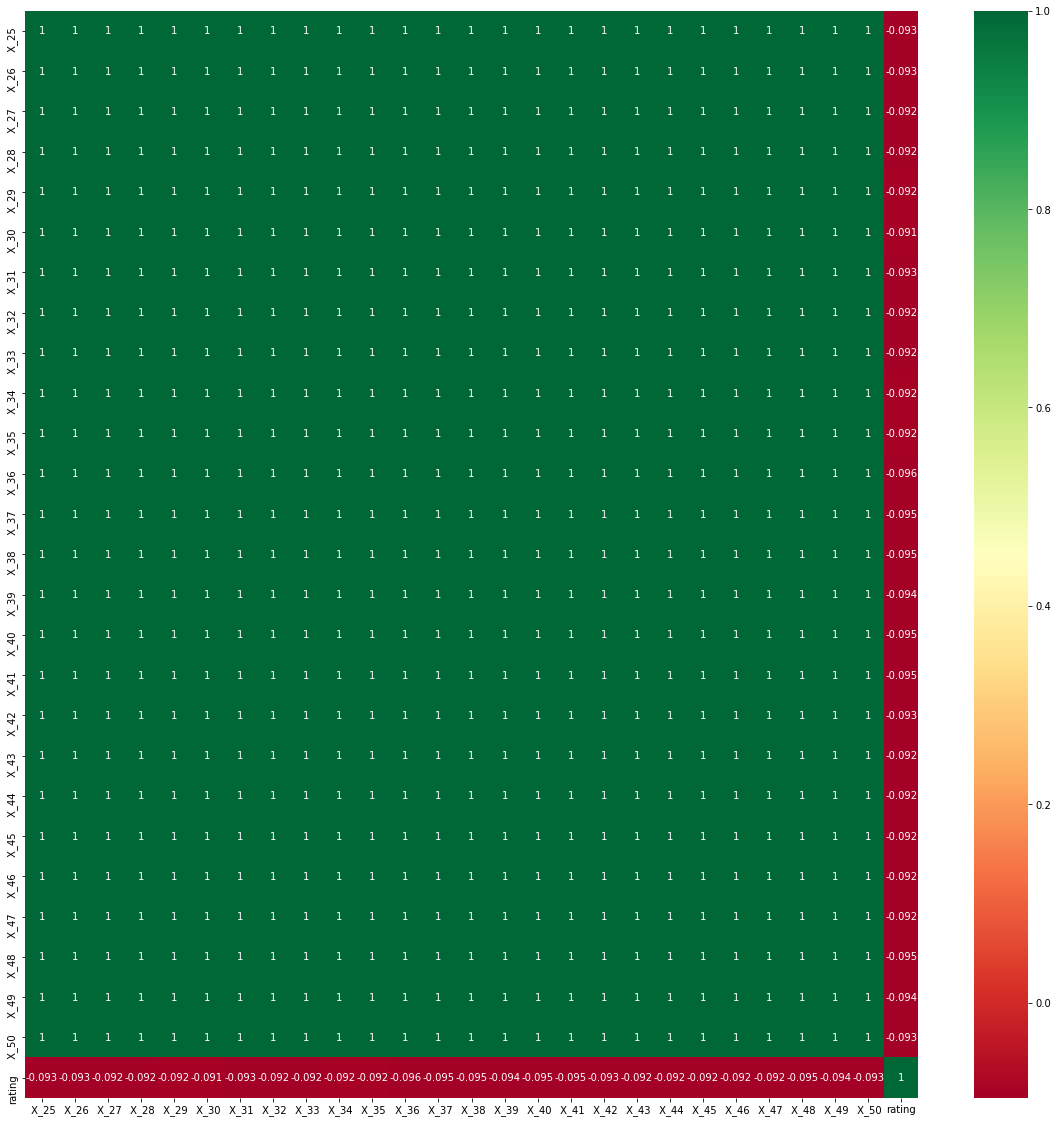

In [37]:
data = mean[[' X_25',  ' X_26',  ' X_27',  ' X_28',  ' X_29',  ' X_30',  ' X_31',  ' X_32',  ' X_33',  ' X_34', ' X_35', ' X_36',  ' X_37',  ' X_38',  ' X_39',  ' X_40',  ' X_41',  ' X_42',  ' X_43',  ' X_44',  ' X_45',  ' X_46',  ' X_47',  ' X_48',  ' X_49',  ' X_50',  'rating']]
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

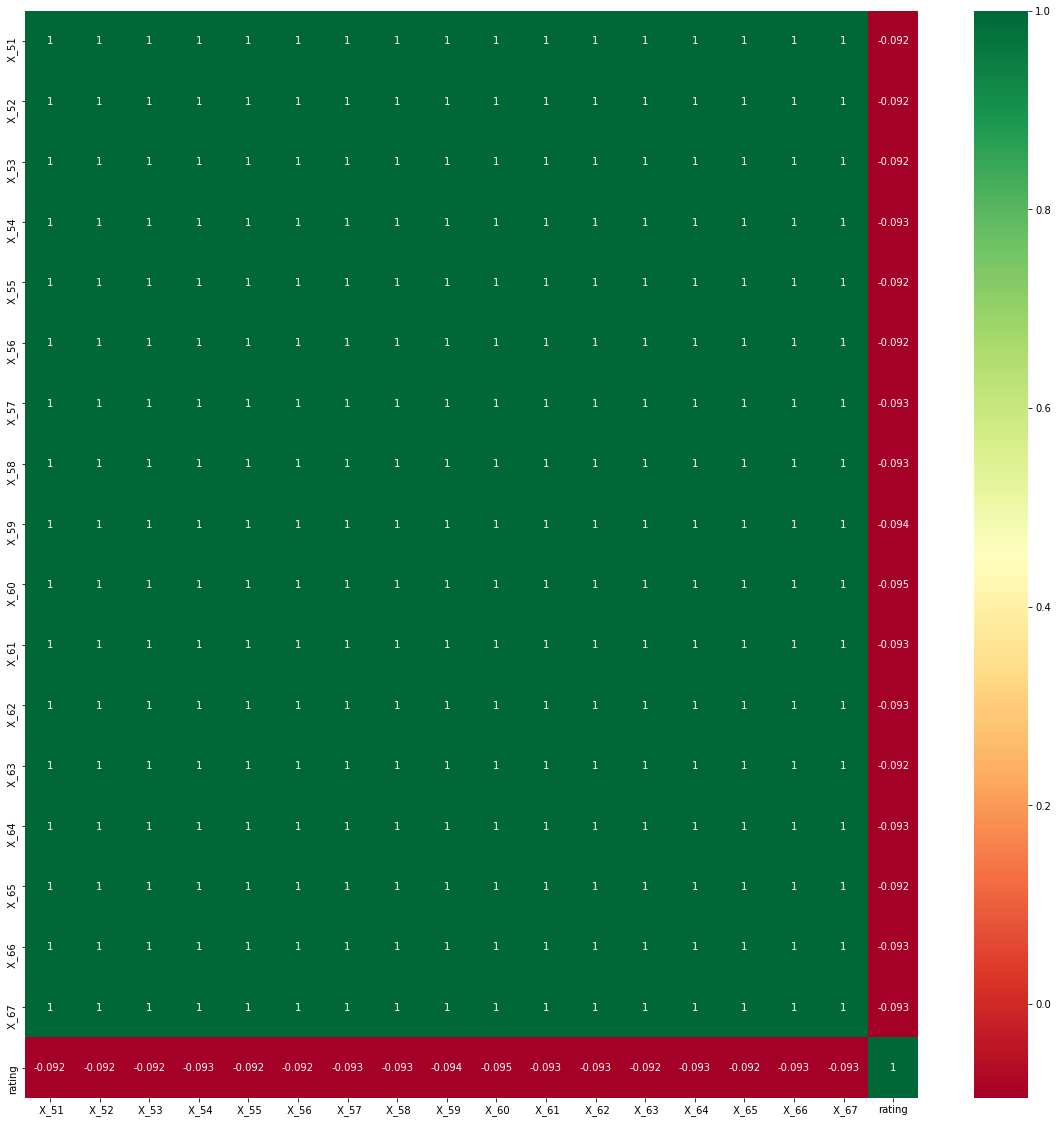

In [38]:
data = mean[[' X_51', ' X_52', ' X_53', ' X_54', ' X_55', ' X_56', ' X_57', ' X_58', ' X_59', ' X_60', ' X_61', ' X_62', ' X_63', ' X_64', ' X_65', ' X_66', ' X_67', 'rating']]
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

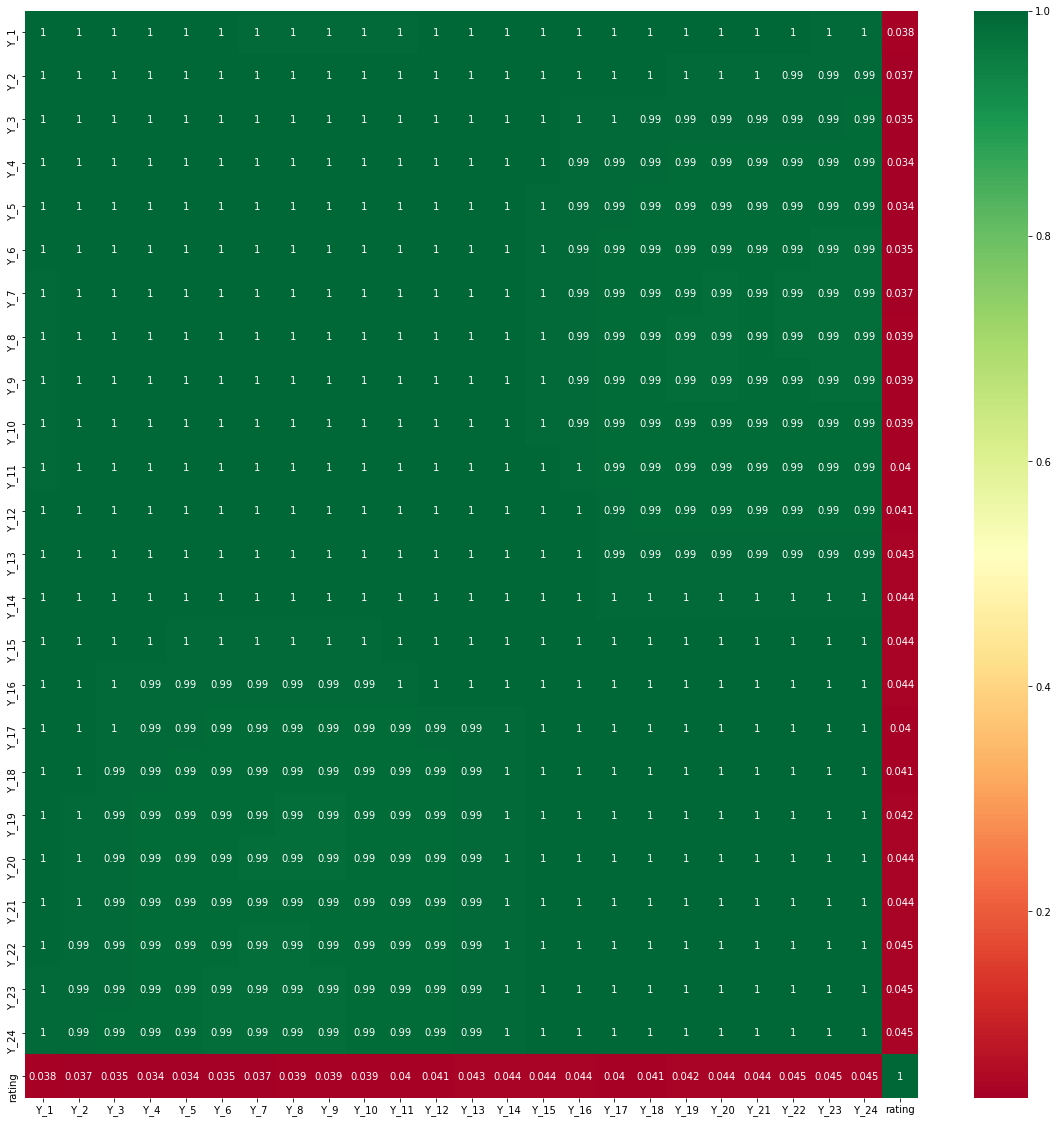

In [39]:
data = mean[[ ' Y_1', ' Y_2',  ' Y_3',  ' Y_4',  ' Y_5',  ' Y_6',  ' Y_7',  ' Y_8',  ' Y_9',  ' Y_10',  ' Y_11',  ' Y_12',  ' Y_13',  ' Y_14',  ' Y_15',  ' Y_16',  ' Y_17',  ' Y_18',  ' Y_19',  ' Y_20',  ' Y_21',  ' Y_22',  ' Y_23',  ' Y_24', 'rating']]
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

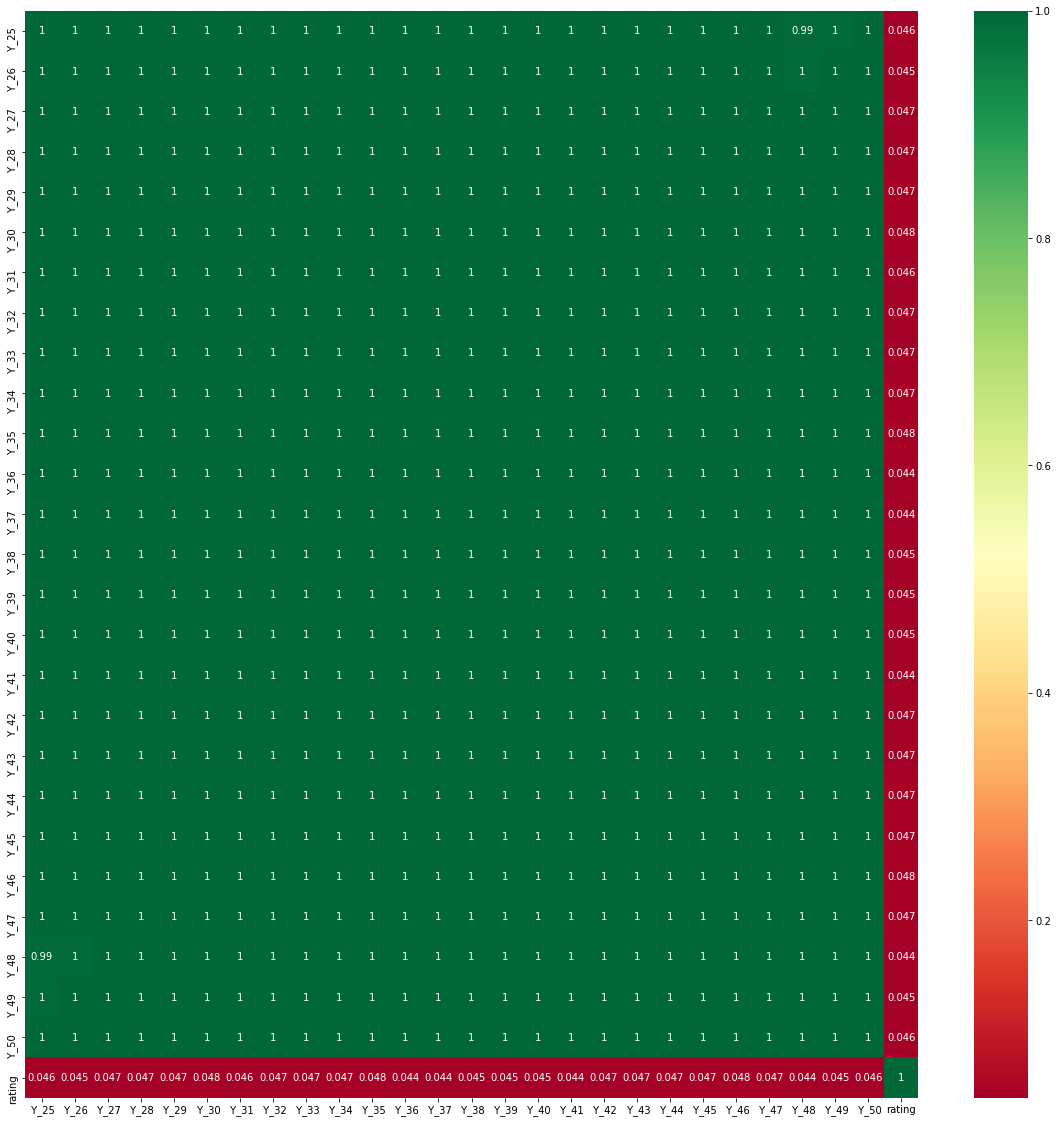

In [40]:
data = mean[[' Y_25',  ' Y_26',  ' Y_27',  ' Y_28',  ' Y_29',  ' Y_30',  ' Y_31',  ' Y_32',  ' Y_33',  ' Y_34', ' Y_35', ' Y_36',  ' Y_37',  ' Y_38',  ' Y_39',  ' Y_40',  ' Y_41',  ' Y_42',  ' Y_43',  ' Y_44',  ' Y_45',  ' Y_46',  ' Y_47',  ' Y_48',  ' Y_49',  ' Y_50',  'rating']]
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

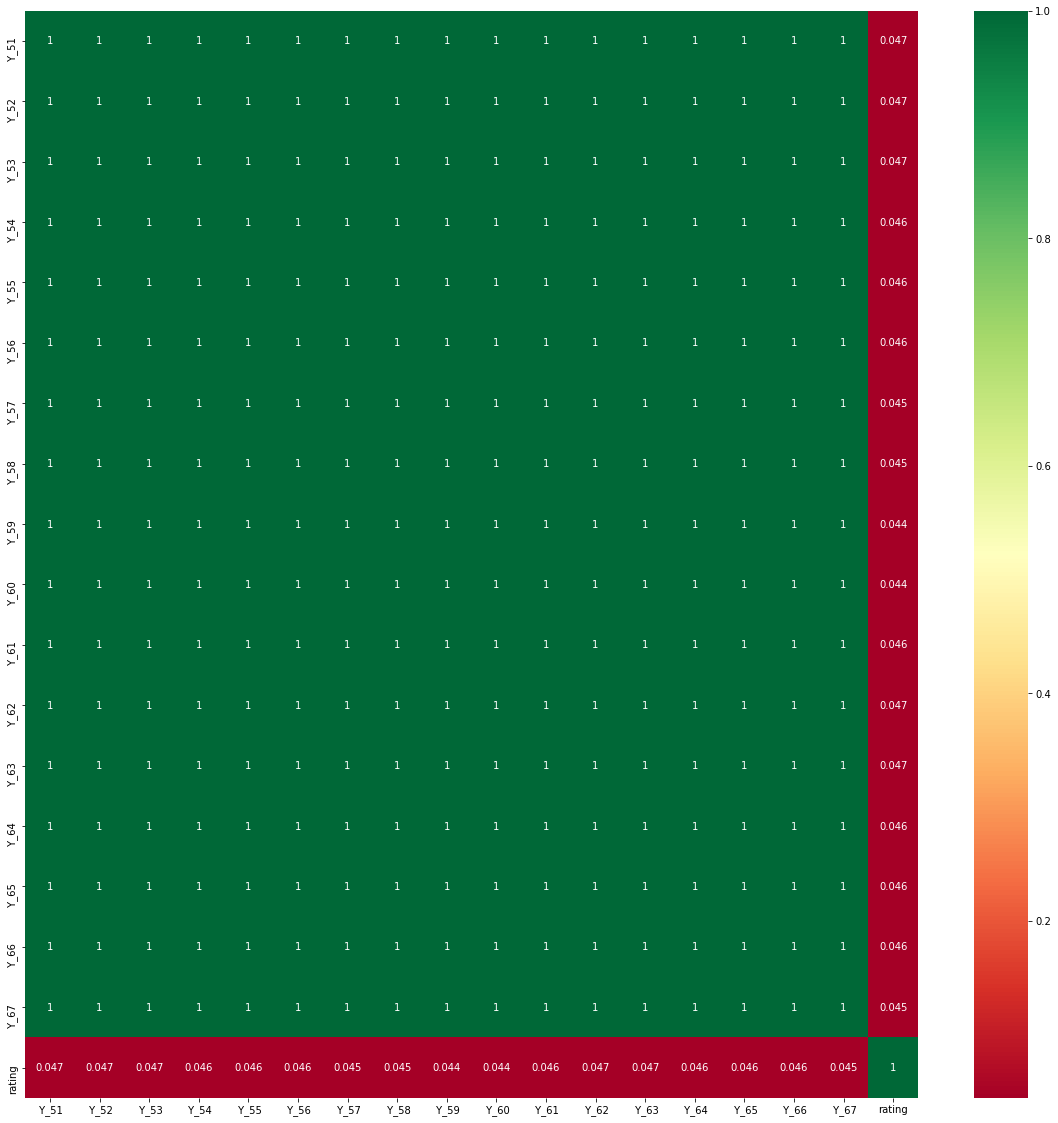

In [41]:
data = mean[[' Y_51', ' Y_52', ' Y_53', ' Y_54', ' Y_55', ' Y_56', ' Y_57', ' Y_58', ' Y_59', ' Y_60', ' Y_61', ' Y_62', ' Y_63', ' Y_64', ' Y_65', ' Y_66', ' Y_67', 'rating']]
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

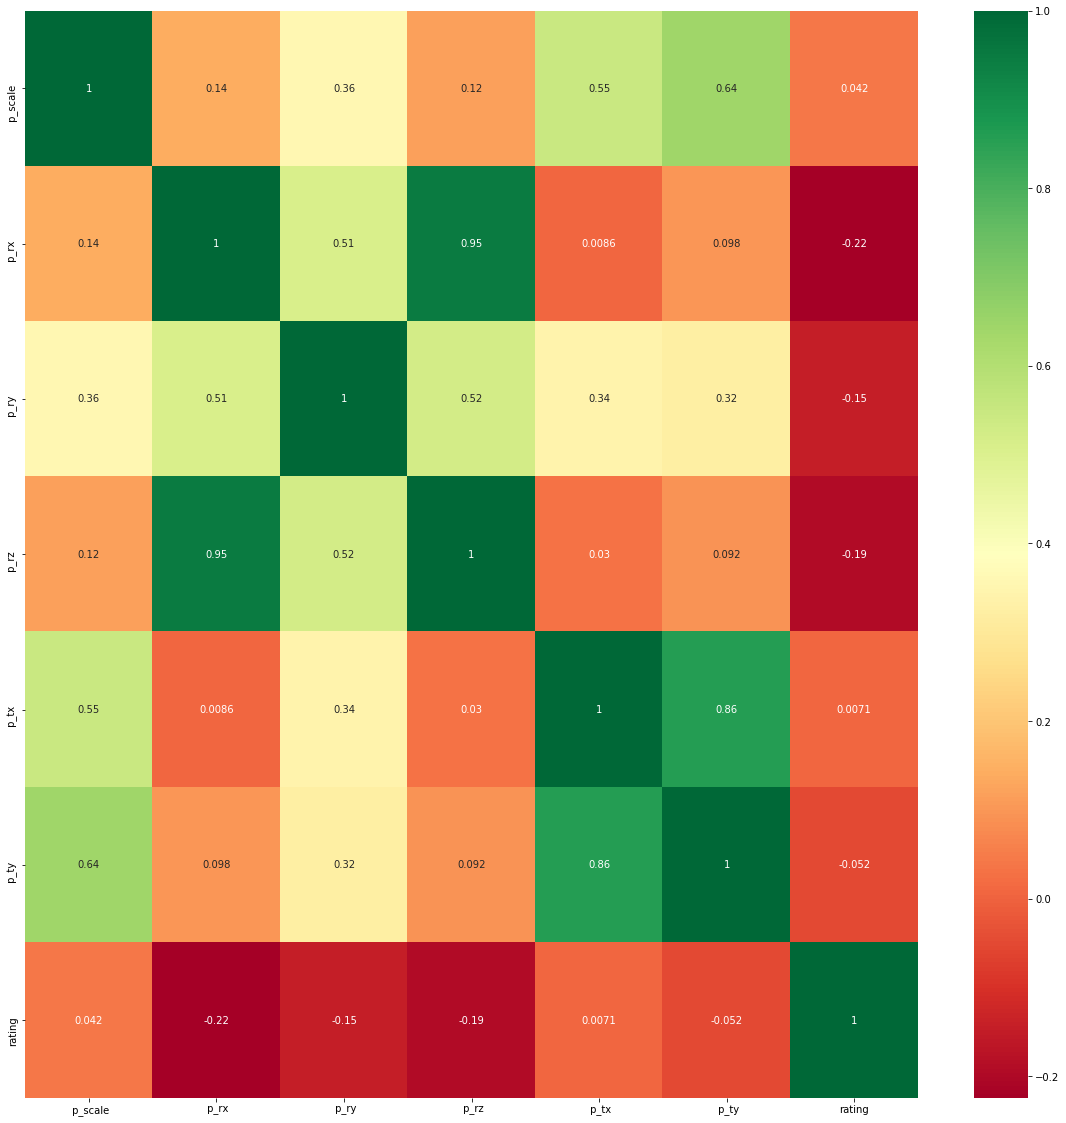

In [42]:
data = mean[[' p_scale', ' p_rx', ' p_ry', ' p_rz', ' p_tx', ' p_ty', 'rating']]
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

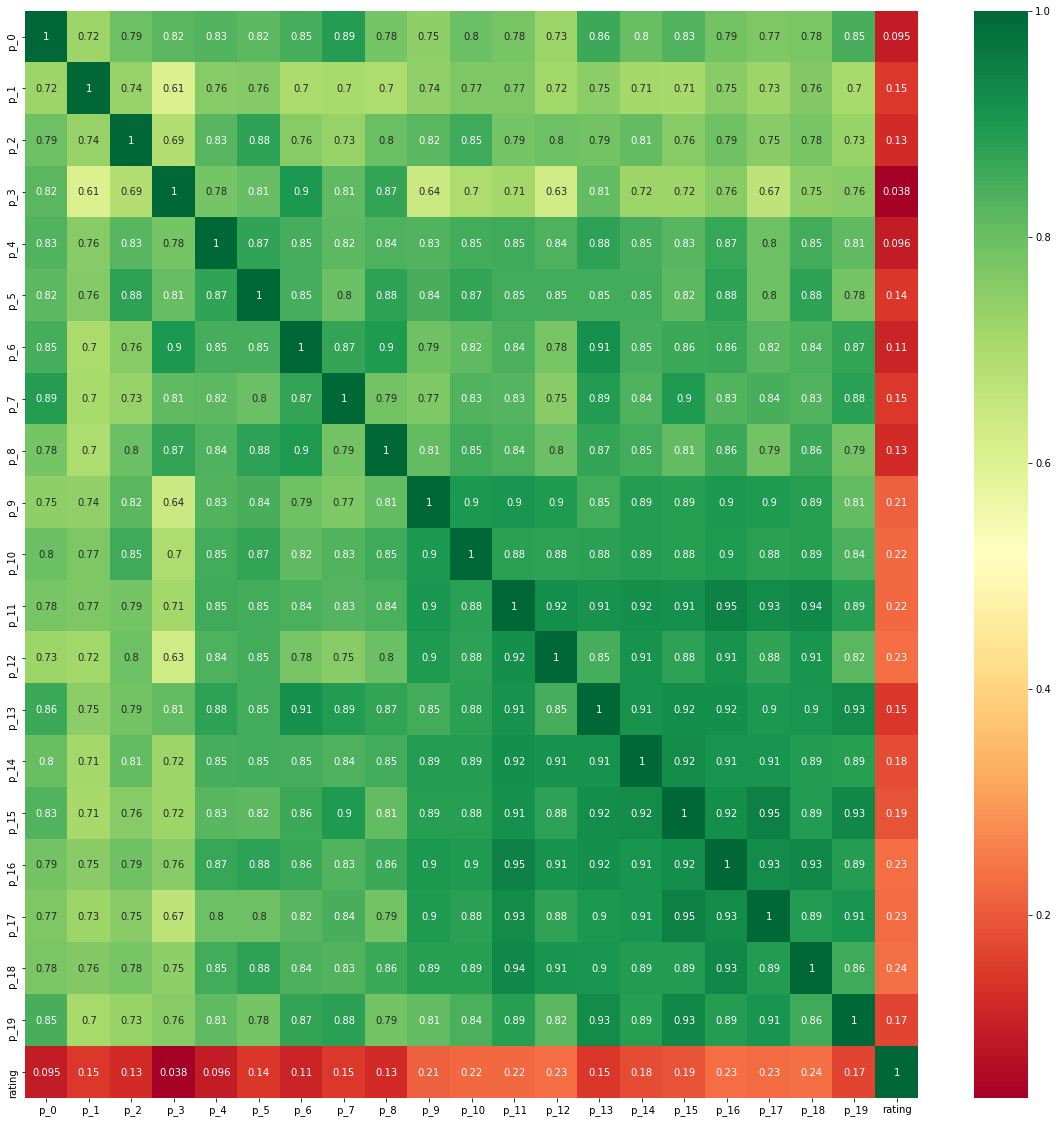

In [43]:
data = mean[[' p_0', ' p_1', ' p_2', ' p_3', ' p_4', ' p_5', ' p_6', ' p_7', ' p_8', ' p_9', ' p_10', ' p_11', ' p_12', ' p_13', ' p_14', ' p_15', ' p_16', ' p_17', ' p_18', ' p_19', 'rating']]
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

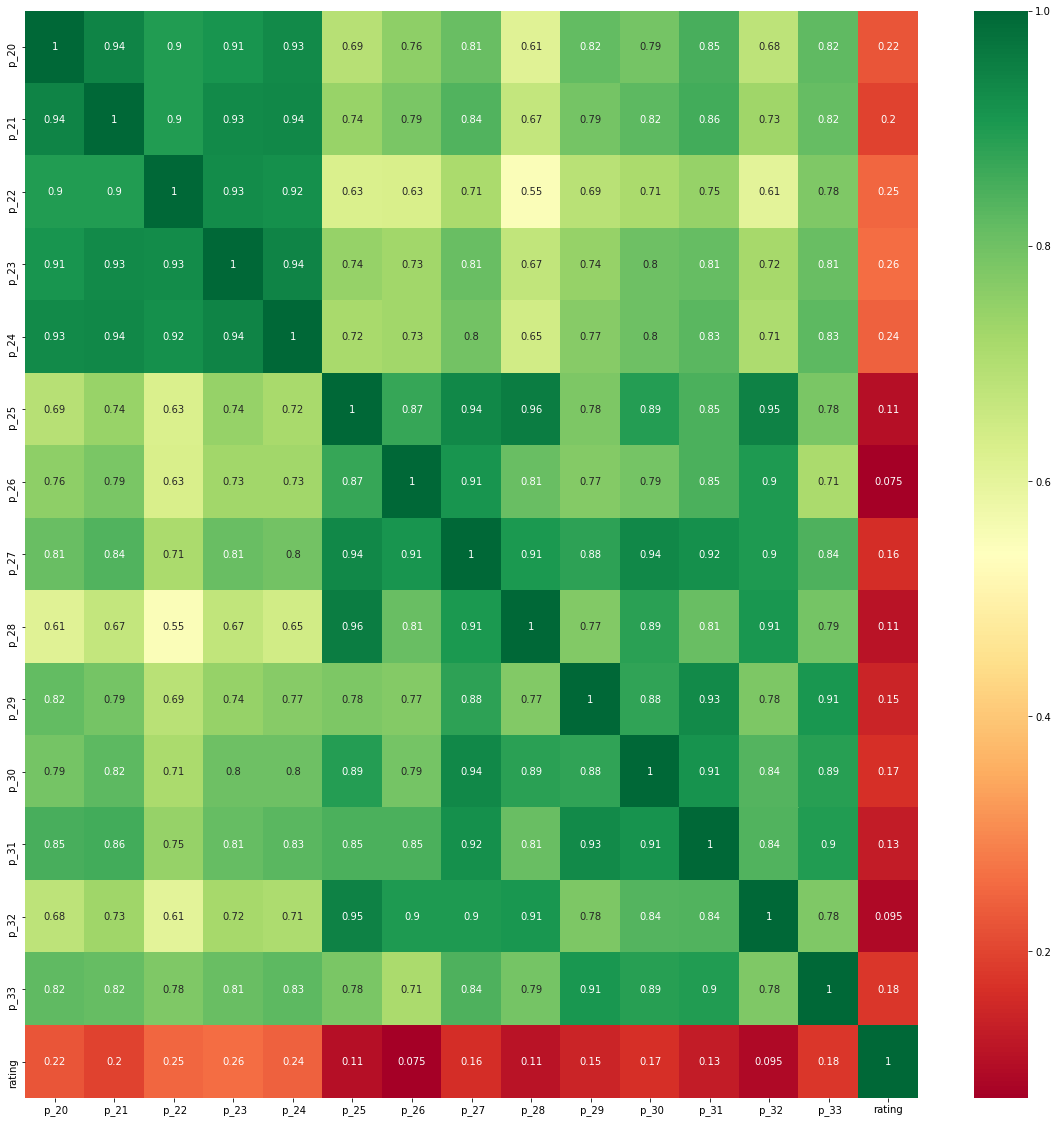

In [44]:
data = mean[[' p_20', ' p_21', ' p_22', ' p_23', ' p_24', ' p_25', ' p_26', ' p_27', ' p_28', ' p_29', ' p_30', ' p_31', ' p_32', ' p_33', 'rating']]
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

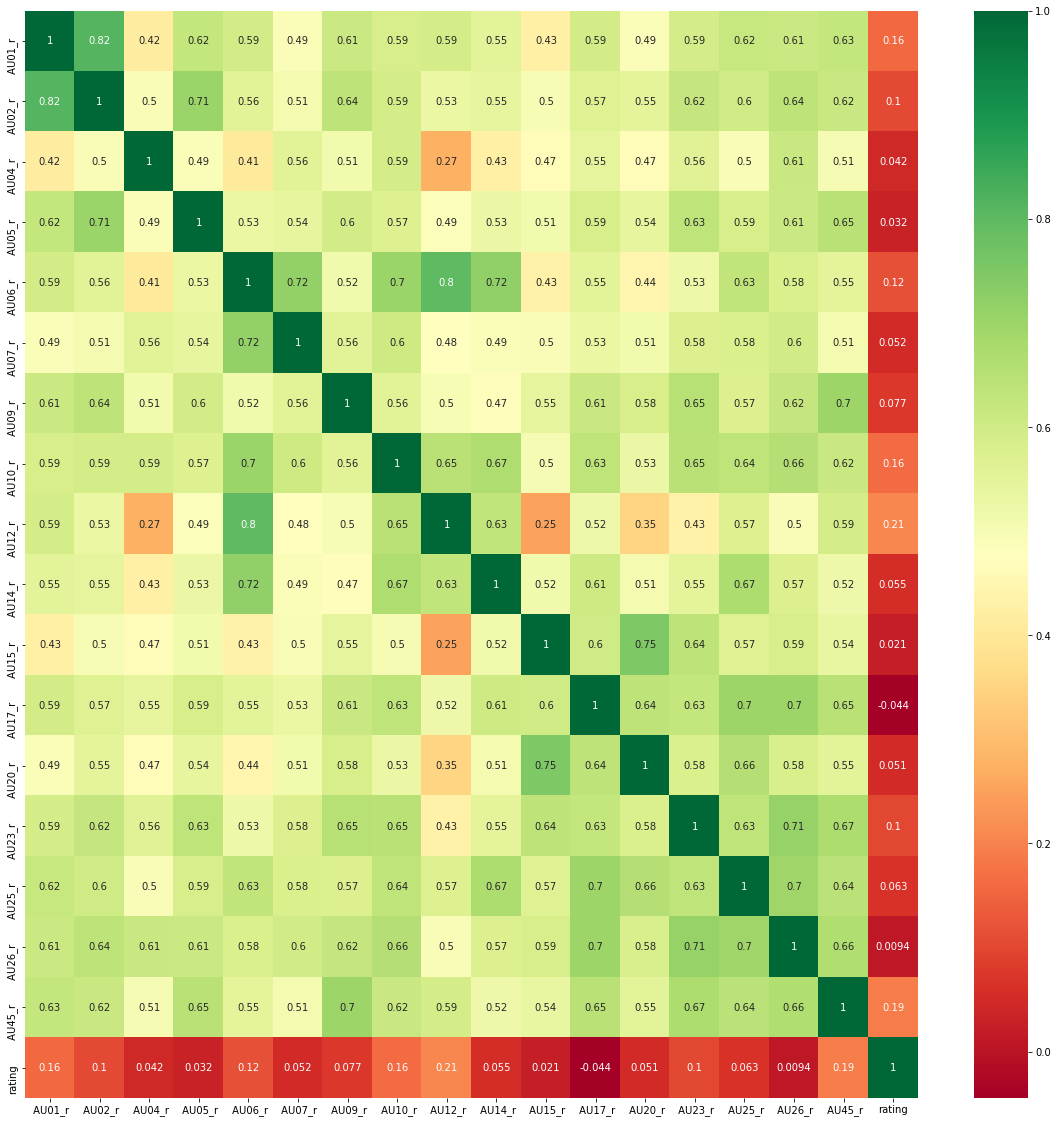

In [45]:
data = mean[[' AU01_r', ' AU02_r', ' AU04_r', ' AU05_r', ' AU06_r', ' AU07_r', ' AU09_r', ' AU10_r', ' AU12_r', ' AU14_r', ' AU15_r', ' AU17_r', ' AU20_r', ' AU23_r', ' AU25_r', ' AU26_r', ' AU45_r', 'rating']]
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

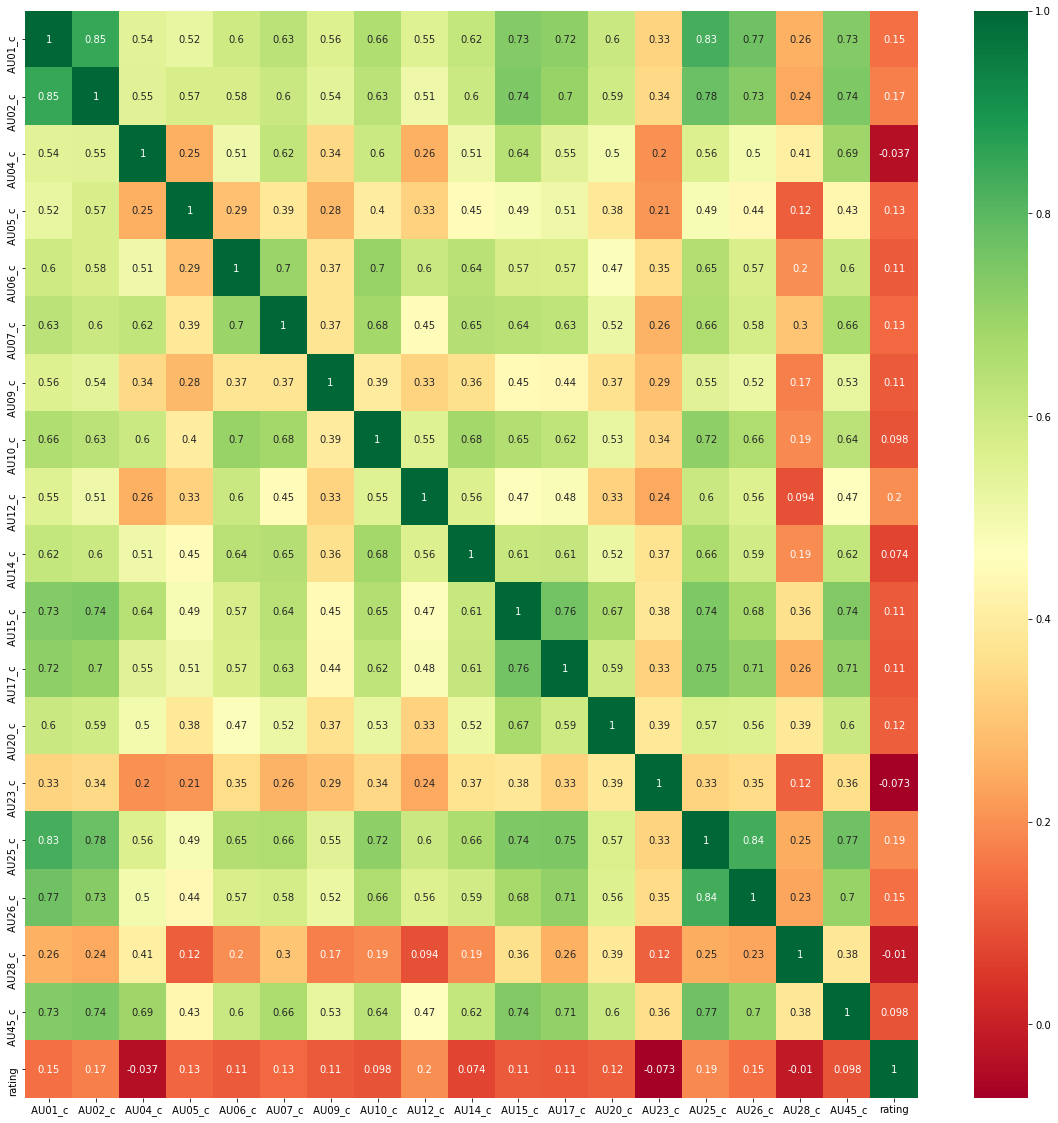

In [46]:
data = mean[[' AU01_c', ' AU02_c', ' AU04_c', ' AU05_c', ' AU06_c', ' AU07_c', ' AU09_c', ' AU10_c', ' AU12_c', ' AU14_c', ' AU15_c', ' AU17_c', ' AU20_c', ' AU23_c', ' AU25_c', ' AU26_c', ' AU28_c', ' AU45_c', 'rating']]
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")